# Project 11: Rocknomics Group 22

## Group members:
- Maria Inês Diogo Ferreira – 50465
- Rômulo de Vasconcelos Feijão Filho – 50530
- Yannick Schad – 51034
- Tim Pleuger - 50487
- Luis Branco - 50409

-------------------------------------------------

## Business Context

### Business Problem

The music market has changed a lot in the last two decades. Consumers are no longer willing to spend so much money to listen to music. This development has made the market more unpredictable and vulnerable. Artists and music labels have had to look for new sources of income on the one hand, and on the other hand, they are more dependent on the success of their released songs.  Especially concerning the release of new albums, artists mostly face a sitation, in which only a couple of songs get very popular and listened by a lot of consumers. Despite to that, artists and songwriters still invest a lot of time and money into each song of an album, even though the return in terms of number of streams or amount of revenue per song varies a lot. Thats why it would be very helpful for music creators to know in advance on what the popularity of a song is dependend on and according to that, include certain attributes within the lyrics or the beat for example. It could allow the music industry for better planning and more security, because a higher popularity of a song is synonymous with a higher number of streams, which in the end results in higher revenues and more royalites for the artists themselves. 

---------------------------------------------------------

### Main objective

**This project aims to predict the popularity of a song given the available data on music, artists and album features, while applying regression algorithms and ML techniques.**


---------------------------------

### Datasets

To solve this problem, a dataset of 175,000 songs from 1921 to 2020 is available from the Spotify Web API. The records are divided into "data_sources" and "extracted_features". In "data_sources" there are three data sets: "albums", "artist", "tracks". In "extracted_features" there are two data sets: "lyrics_feature" and "low_level_audio_features". Bellow, you will find an overview of our a available datasets as well as its containing features.

![features_overview.jpg](spotify_schema.png)

Regarding the table of **"lyrics_features"**, we face the variable of "track_id", which helps us to merge our single datasets into one, since the same variable is present in every other datatable, except for one. Out of this data we will check, whether certain features such as "mean_syllables_word" does have an influence on the popularity of a song or not.

Next the **"low_level_audio_features"**. The variables contained are not very self-explanatory, since they have names such as "Chroma 1" or "MFCC_1". So on the first look it can be quit challenging to find out, whether these features have any kind of influence on a popularity of a song or not. We will examine on that by checking these correlations to our target variable in the EDA part.

Coming to the data_sources tables. The **"album dataset"** contains specific information about a released album. From this dataset, on the one hand, we just try to keep information, which can be helpful for our analysis part. Examples for this are the album_type or available markets. On the other hand, we can get rid of information, which certainly do not have any impact on our popularity, for instance "external_urls".

Further, the **"artists"** table contains certain details about the artists themselves, such as the number of followers, the applicable genres or even the artist_popularity. 

Lastly we have the **"tracks"** dataset. This data does not contain the "track_id" variable, so that we needed to find out another variable, which allows us to merge our datasets. It can either be the "artist_id" which is equal to the variable "id" from the artists dataset or taking the album_id as well as the artist_id, which can be found in the other datasources. Additionally, our target variable "popularity" is contained in this dataset. This table contains our main variables of interest for the tracks, however in order to complement the datsets we should use the track id in order to get more variables from the other tables. 

-----------------------------
In our analysis, first, an exploratory data analysis is performed to understand and summarize the data set. The dependent variable is popularity, which can range from 0 to 100. Next, we check whether certain features are relevant to complement our main table. After that checking, the correlations to find out the most relevant contribution to the defined objective. 

There is no data dictionary for the data set; it must be to find out yourself. The three datasets from "data_source" on a specific 'key'  is merged to fulfil the dataset and have enough information available.

-------------------
### Applicability of Machine Learning 

To frame the problem and qualify if machine learning is needed for the project, we applied the "ML Recipe" from the second lecture (slides 4 -10). 

1. Do you need machine learning? 

    First, we have a very high complexity of rules; the dataset has over 175,000 songs with many different features. Second, the features are complex and ambiguous and have a large problem scale. These two factors must be present to solve a problem with machine learning.  
    The large data set has many variables that could influence the popularity of its song. This problem cannot be solved by hand. Therefore machine learning is applicable in this case. 
    
    * Low level audio features (complexity)
    
    
2. Can you formulate your problem clearly?

    The benefit for artists or music labels is knowing whether a song will be popular and which features are crucial for it, and how. 
    The goal will be to take the selected features as input and use them to predict a song's popularity (output). 
    
    In this case, the problem is that we do not know which features impact our target (song popularity). We also do not know how significant the influence of individual features is. We can find out with the help of data analysis and different machine learning models.
    
    
3. Do you have sufficient data?

    We have sufficient and right data to solve the problem: 175.000 songs between 1921-2020 collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section. The audio features and track features are also included 
    
    
4. Does your problem have a regular pattern?

    To get a regular pattern, we check the correlation between features. The highest correlation to "Song Popularity" is " Artist Popularity". 
    
    
5. Can you find meaningful representations of your data? 

    Selected features: tbd
    
    
6. How do you define success?

    Evaluation function should predict if popularity is high enough and artist or music label should release the song. With the help of machine learning, the optimize a training criteria should be used in this regression problem. And thereby we try to minimize the error.
    
    Defined evaluation criterias: 
        MAE: >=7 
        MSE: >=85 
        R^2: >=0.6 
        
    * Remove thresholds

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 500)

C:\Users\Luis\anaconda3\envs\ml_tensor\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load the data
original_wd = os.getcwd()

os.chdir("SpotGenTrack/DataSources")

artists = pd.read_csv("spotify_artists.csv", index_col=0)
albums = pd.read_csv("spotify_albums.csv", index_col=0)
tracks = pd.read_csv("spotify_tracks.csv", index_col=0)

os.chdir(original_wd)
os.chdir("SpotGenTrack/FeaturesExtracted")

lyrics = pd.read_csv("lyrics_features.csv", index_col=0)
low_level = pd.read_csv("low_level_audio_features.csv", index_col=0)

In [3]:
tracks_df = tracks.copy()

In [4]:
tracks_df.head()

acousticness                album_id  \
0         0.294  0D3QufeCudpQANOR7luqdr   
1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         0.750  4tKijjmxGClg4JOLAyo2qE   
3         0.763  6FeJF5r8roonnKraJxr4oB   
4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  energy  \
0          1.0     235584.0   0.606   
1          1.0     656960.0   0.308   
2          1.0     492840.0   0.931   
3          1.0     316578.0   0.126   
4          1.0     558880.0   0.942   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...  5qljLQuKnNJf4F4vfxQB0V   
1  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...  3VAX2MJdmdqARLSU5hPMpm   
2  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...  1L3YAhsEMrGVvCgDXj2TYn   
3  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...  6aCe9zzoZmCojX7bbgKKtf   
4  https://api.spotify.com/v1/tracks/1Vo802A38tPF...  1Vo802A38tPFHmje1h91um   

   instrumentalness   key  liveness  loudness  \
0          0.000003  10.0     0.151    -7.447   
1          0.000000   6.0     0.253   -10.340   
2          0.000000   4.0     0.938   -13.605   
3          0.000000   3.0     0.113   -20.254   
4          0.000000   7.0     0.917   -13.749   

                                              lyrics  mode  \
0  \r\n\r\nPerhaps I am bound to be restless\r\nA...   0.0   
1  \r\nYour Gods and my Gods-do you or I know whi...   1.0   
2  \r\n\r\nClosed off from love, I didn't need th...   0.0   
3  \r\nPAIN, n. An uncomfortable frame of mind th...   0.0   
4  \r\n\r\nClosed off from love, I didn't need th...   1.0   

                                              name                playlist  \
0                                            Blood         Hipsteribrunssi   
1                                The Ugly Duckling          Animal Stories   
2  Jimmy Launches His Own Range Of Greetings Cards  Best Of British Comedy   
3                        The Crime At Pickets Mill           Short Stories   
4                         Setup + Punchline = Joke  Best Of British Comedy   

   popularity                                        preview_url  speechiness  \
0        28.0  https://p.scdn.co/mp3-preview/1b05a902da3a251d...       0.0262   
1        31.0  https://p.scdn.co/mp3-preview/d8140736a6131cb5...       0.9220   
2        31.0  https://p.scdn.co/mp3-preview/c8af28fb15185b18...       0.9440   
3        14.0  https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...       0.9380   
4        32.0  https://p.scdn.co/mp3-preview/32be593c0eb82868...       0.9430   

     tempo  time_signature                                         track_href  \
0  115.018             4.0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...   
1  115.075             3.0  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...   
2   79.565             4.0  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...   
3  112.822             3.0  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo.

In [5]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101939 entries, 0 to 101938
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101939 non-null  float64
 1   album_id           101939 non-null  object 
 2   analysis_url       101939 non-null  object 
 3   artists_id         101939 non-null  object 
 4   available_markets  101939 non-null  object 
 5   country            101939 non-null  object 
 6   danceability       101939 non-null  float64
 7   disc_number        101939 non-null  float64
 8   duration_ms        101939 non-null  float64
 9   energy             101939 non-null  float64
 10  href               101939 non-null  object 
 11  id                 101939 non-null  object 
 12  instrumentalness   101939 non-null  float64
 13  key                101939 non-null  float64
 14  liveness           101939 non-null  float64
 15  loudness           101939 non-null  float64
 16  ly

---------------------------------------
## Data

We'll start by looking into our main table "tracks". This table contains data related to the tracks as described below.

**Unique Numerical Variables for each song:**
* **Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* **Danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
* **duration_ms** : Duration of the track in ms.
* **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* **instrumentalness** : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
* **key** : The estimated overall key of the track.
* **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* **loudness** : The overall loudness of a track in decibels (dB)
* **mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
* **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **time signature** : An estimated overall time signature of a track.
* **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Other than these variables we also have id , region and url information. For our analysis we can exclude url and image data.

---------------------------------------

In [6]:
tracks_df.drop(["analysis_url", "href", "preview_url", "track_href", "uri"], axis=1, inplace=True)

In [7]:
tracks_df.describe().transpose()

count           mean            std     min          25%  \
acousticness      101939.0       0.352124       0.334855     0.0       0.0407   
danceability      101939.0       0.586015       0.177724     0.0       0.4800   
disc_number       101939.0       1.032166       0.566789     1.0       1.0000   
duration_ms       101939.0  246770.803304  190430.295141  1155.0  184000.0000   
energy            101939.0       0.586479       0.260170     0.0       0.4110   
instrumentalness  101939.0       0.148776       0.304024     0.0       0.0000   
key               101939.0       5.270858       3.577679     0.0       2.0000   
liveness          101939.0       0.197640       0.175391     0.0       0.0956   
loudness          101939.0      -9.462720       6.198508   -60.0     -11.1490   
mode              101939.0       0.618154       0.485841     0.0       0.0000   
popularity        101939.0      39.782311      16.790769     0.0      29.0000   
speechiness       101939.0       0.128841       0.203324     0.0       0.0364   
tempo             101939.0     118.358527      30.224074     0.0      95.9730   
time_signature    101939.0       3.875651       0.517008     0.0       4.0000   
track_number      101939.0       4.608060       7.181805     1.0       1.0000   
valence           101939.0       0.482813       0.261690     0.0       0.2710   

                            50%          75%          max  
acousticness           0.238000       0.6450        0.996  
danceability           0.610000       0.7140        0.989  
disc_number            1.000000       1.0000       81.000  
duration_ms       216893.000000  261055.0000  5505831.000  
energy                 0.629000       0.7980        1.000  
instrumentalness       0.000037       0.0344        1.000  
key                    5.000000       8.0000       11.000  
liveness               0.124000       0.2410        0.999  
loudness              -7.599000      -5.5090        2.719  
mode                   1.000000       1.0000        1.000  
popularity            41.000000      52.0000       97.000  
speechiness            0.050600       0.1040        0.969  
tempo                118.067000     136.0450      244.035  
time_signature         4.000000       4.0000        5.000  
track_number           2.000000       6.0000      655.000  
valence                0.477000       0.6930        0.993

In [8]:
tracks_df.describe(include="O").transpose()

count  unique  \
album_id           101939   75503   
artists_id         101939   54673   
available_markets  101939    3181   
country            101939       3   
id                 101939  101939   
lyrics             101939   40818   
name               101939   85552   
playlist           101939    3800   
track_name_prev    101939     100   
type               101939       1   

                                                                 top    freq  
album_id                                      65ujg0YuXfO1usl4EPhqVY     100  
artists_id                                ['0LyfQWJT6nXafLPZqxe9Of']     284  
available_markets  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   65351  
country                                                           AR   50437  
id                                            5qljLQuKnNJf4F4vfxQB0V       1  
lyrics                                                           -99   14686  
name                                                            Home      45  
playlist                                           Comedy Top Tracks     129  
track_name_prev                                             track_12    2241  
type                                                           track  101939

With these descriptive statistics tables we can get an overview of the content of the variables included in our main table. Most of our main variables are scaled from 0 to 1 already, not all. Some of our numeric variables also appear to be nominal and not continuous which should be handled. We'll analyze the relationship of our variables with our target, "popularity".

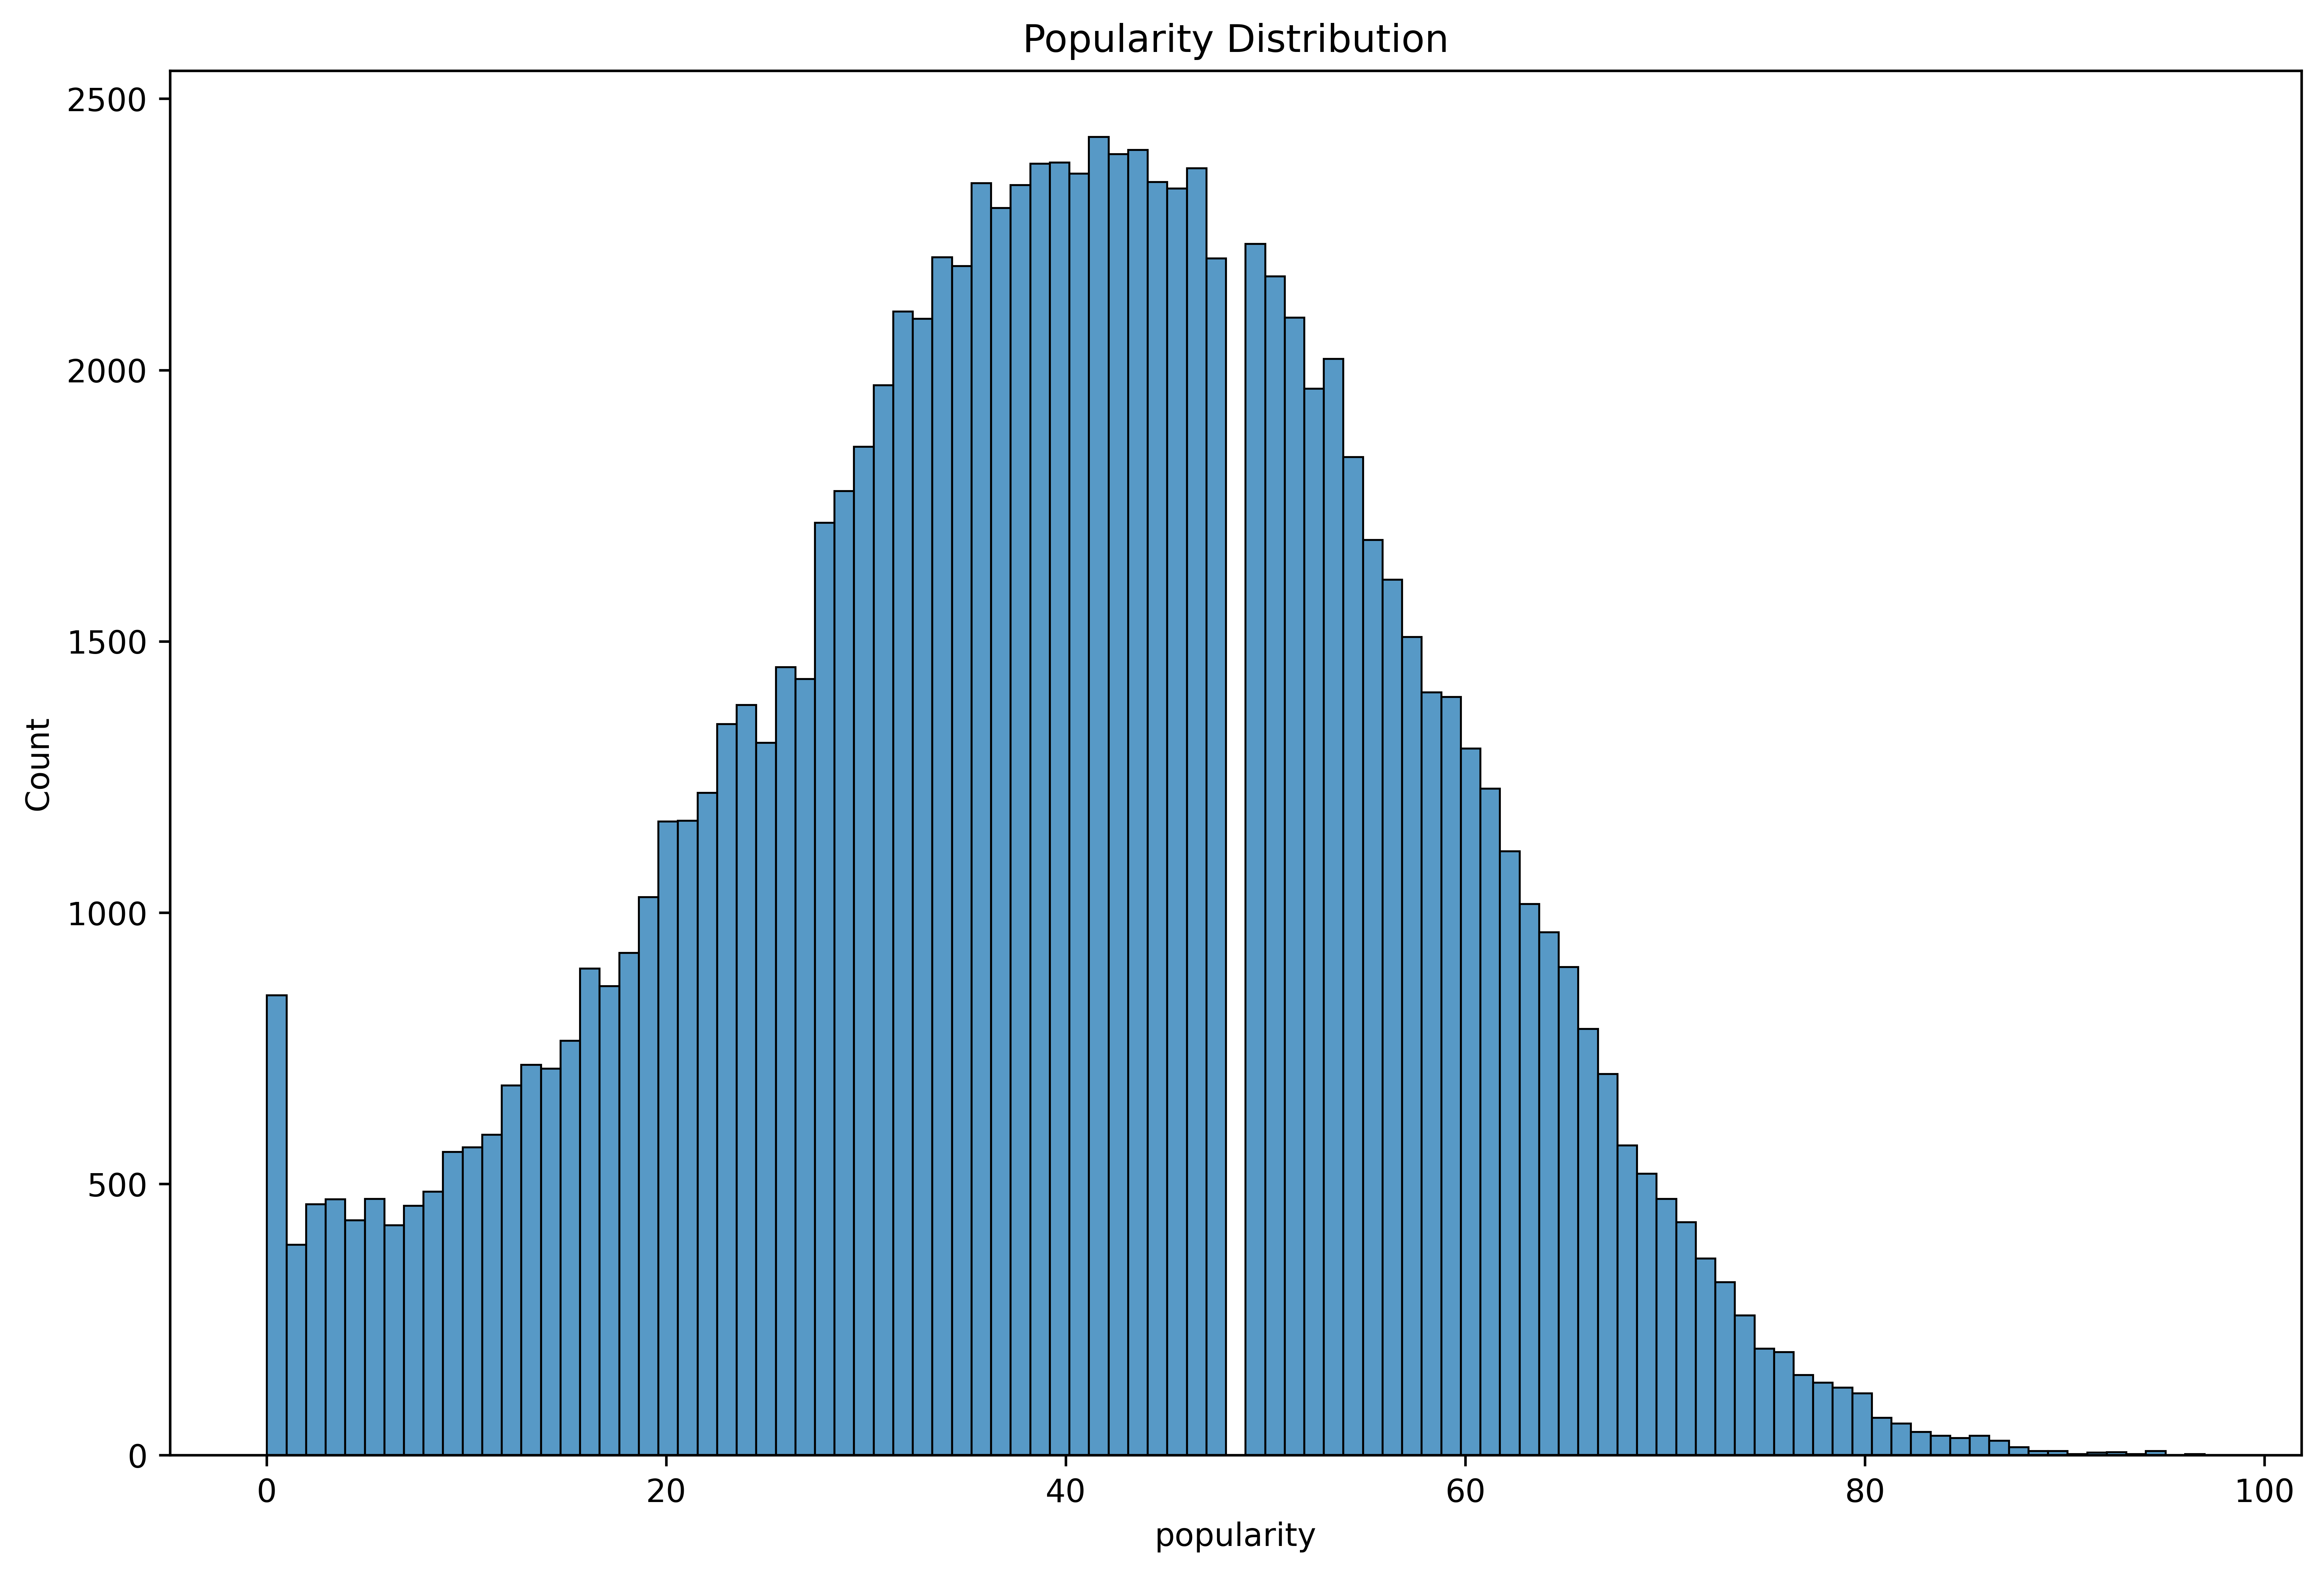

In [9]:
plt.figure(figsize=(12,8), dpi=600)
plt.title('Popularity Distribution')
sns.histplot(tracks['popularity']);

In [10]:
tracks[tracks['popularity'] > 60].shape[0] / tracks.shape[0] * 100

10.702478933479826

Our target variable seems to have a skewed distribution to the left and only around 10.7 % of the values are above 60. This can not allow us to change this variable to a discrete format. We could transform into a "popular", "not popular" format.

In [11]:
tracks_df.corr()["popularity"].sort_values(ascending=False)[1:]

loudness            0.239679
energy              0.153979
time_signature      0.121505
danceability        0.092382
tempo               0.061869
valence             0.034412
key                -0.000641
mode               -0.010003
instrumentalness   -0.041537
disc_number        -0.047331
liveness           -0.059116
track_number       -0.139460
acousticness       -0.154408
duration_ms        -0.169125
speechiness        -0.304212
Name: popularity, dtype: float64

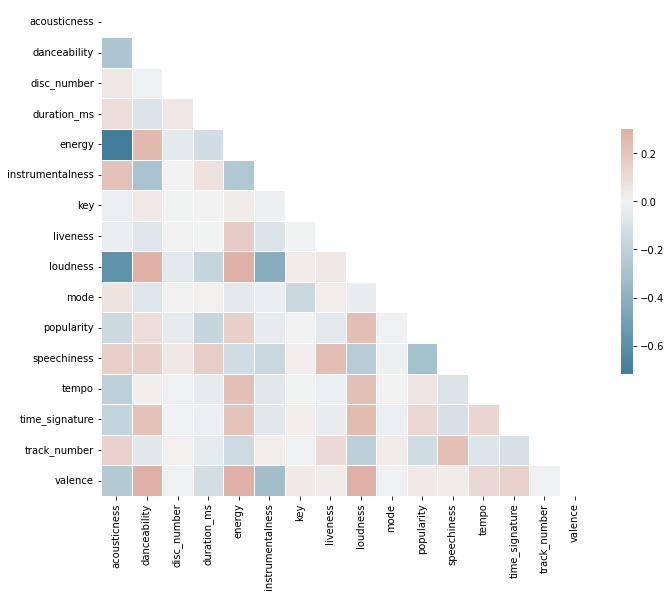

In [12]:
corr = tracks_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

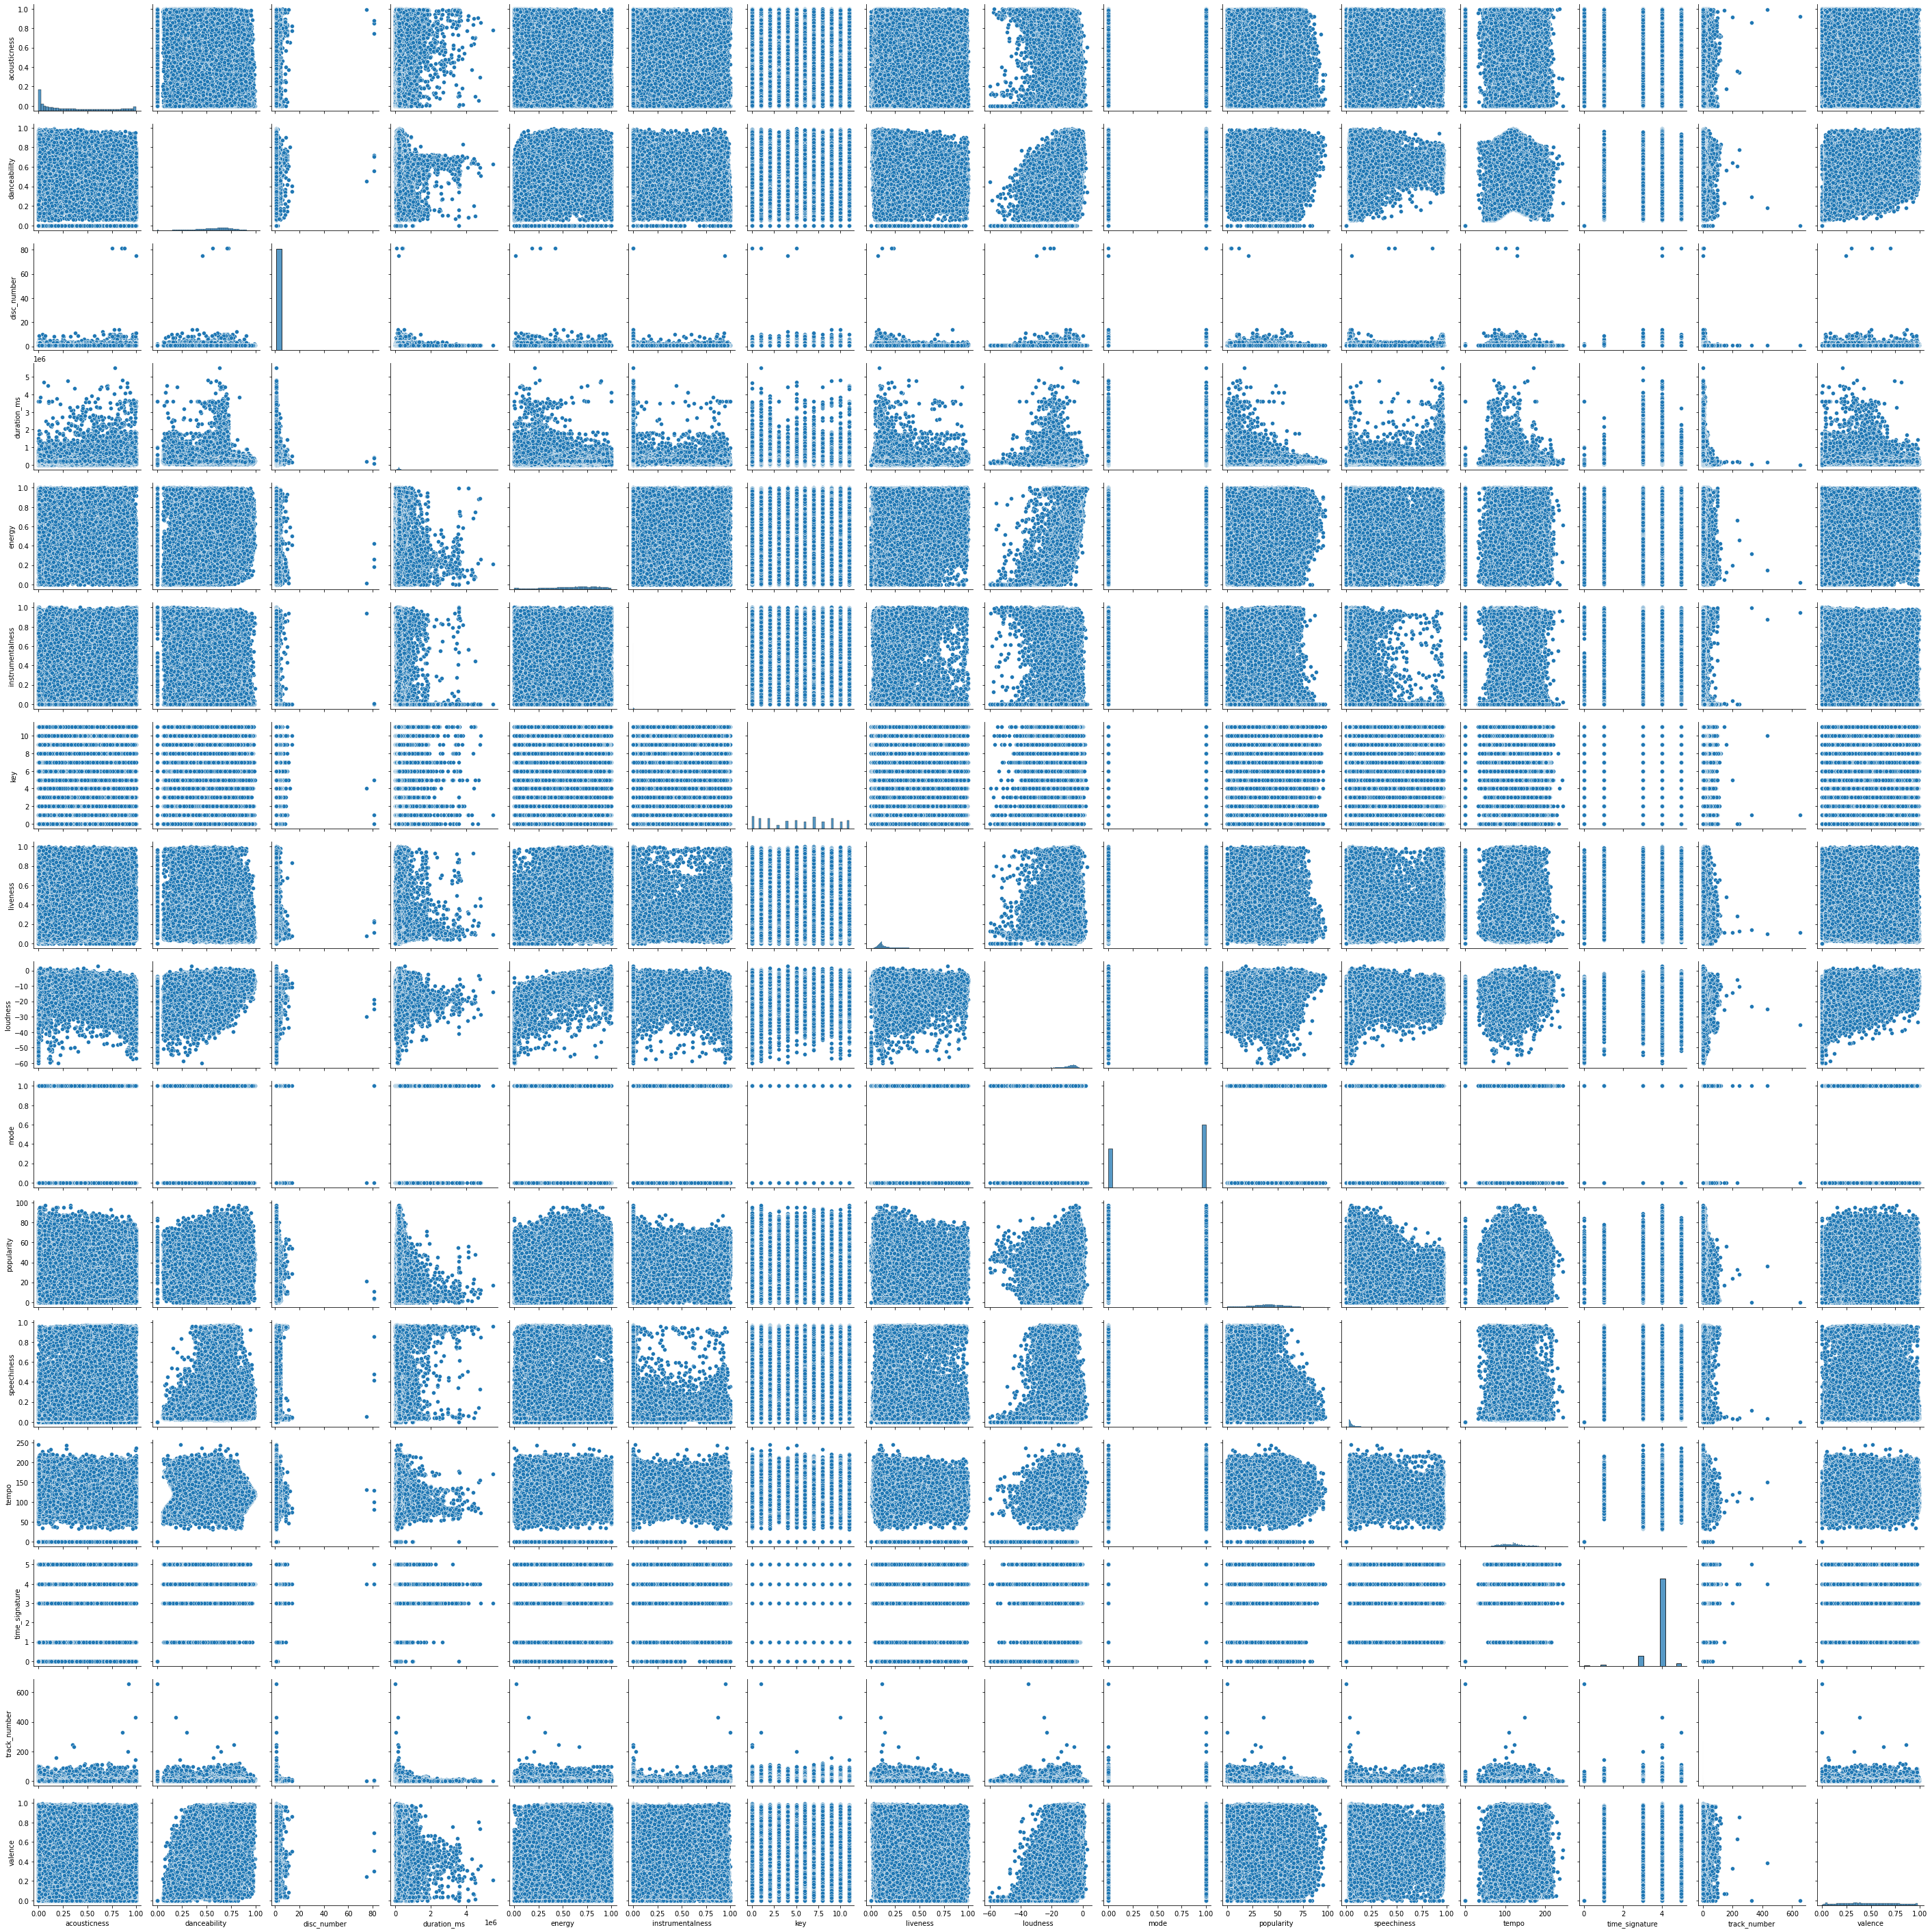

In [13]:
sns.pairplot(tracks_df);

**Main Takeaways** :

* There are not clear linear relationships with our target variable.
* key, mode and time_signature are of nominal type.
* duration_ms seems to have the clearest relationship showing the longer the track the smaller the popularity.

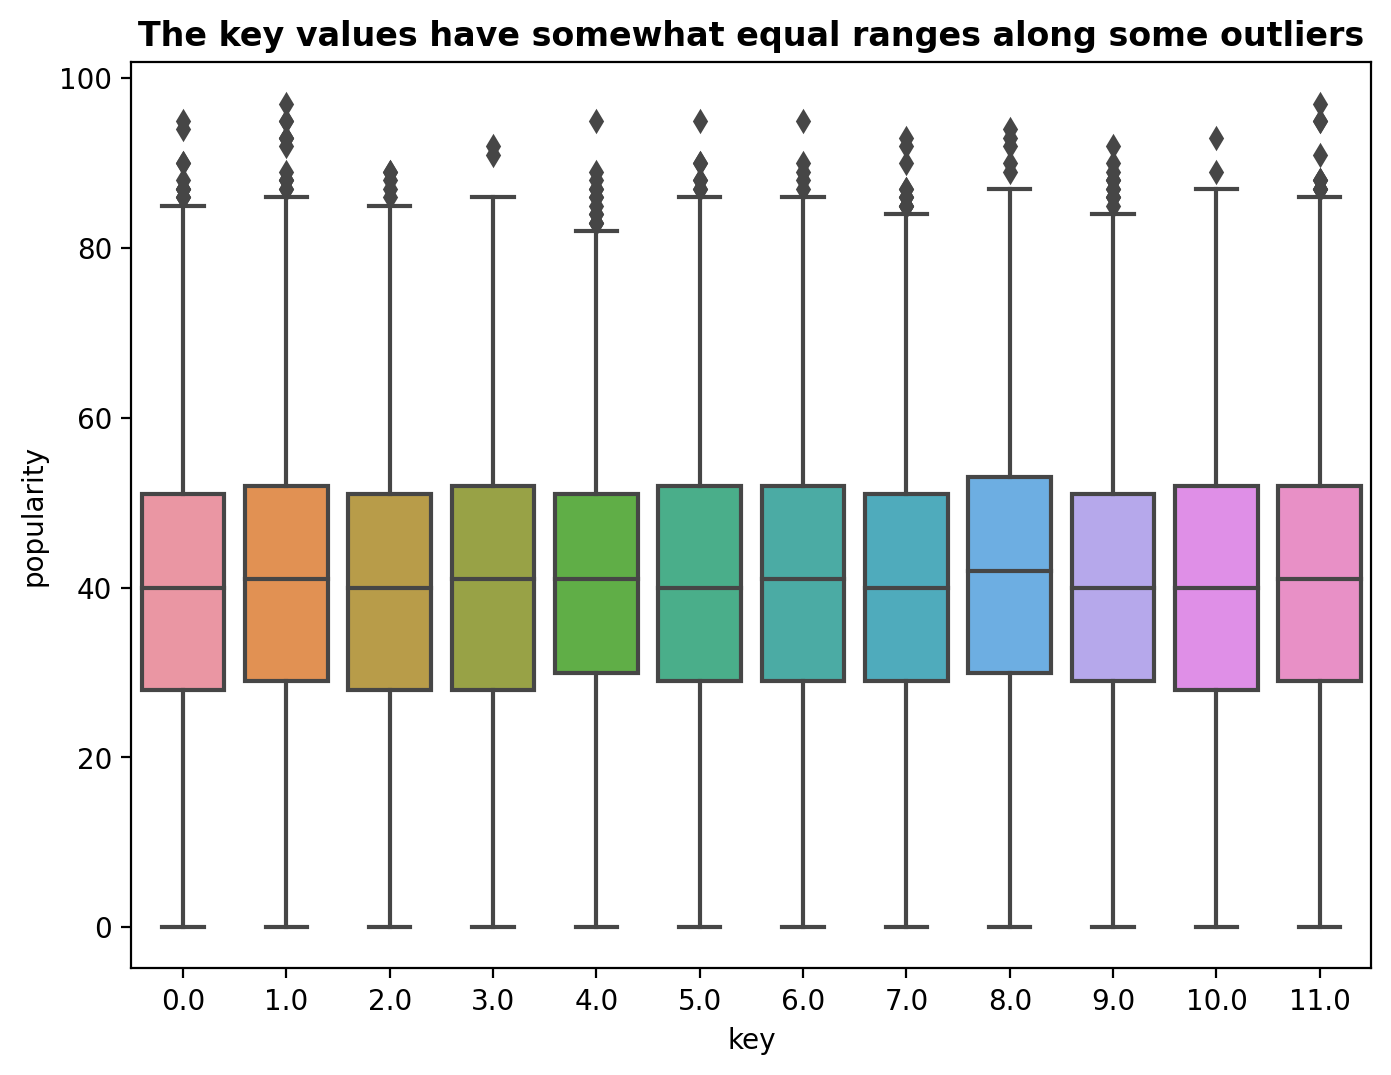

In [14]:
plt.figure(figsize=(8,6), dpi=200)
plt.title("The key values have somewhat equal ranges along some outliers", 
          fontsize=12, fontweight="bold")
sns.boxplot(data=tracks_df, x="key", y="popularity");

The variable key seems to have 12 unique values, with nominal type. With the help of this plot we can't observe different popularity distributions for each value. The nonexistent correlation is made apparent and it may be relevant to remove this variable for our model.

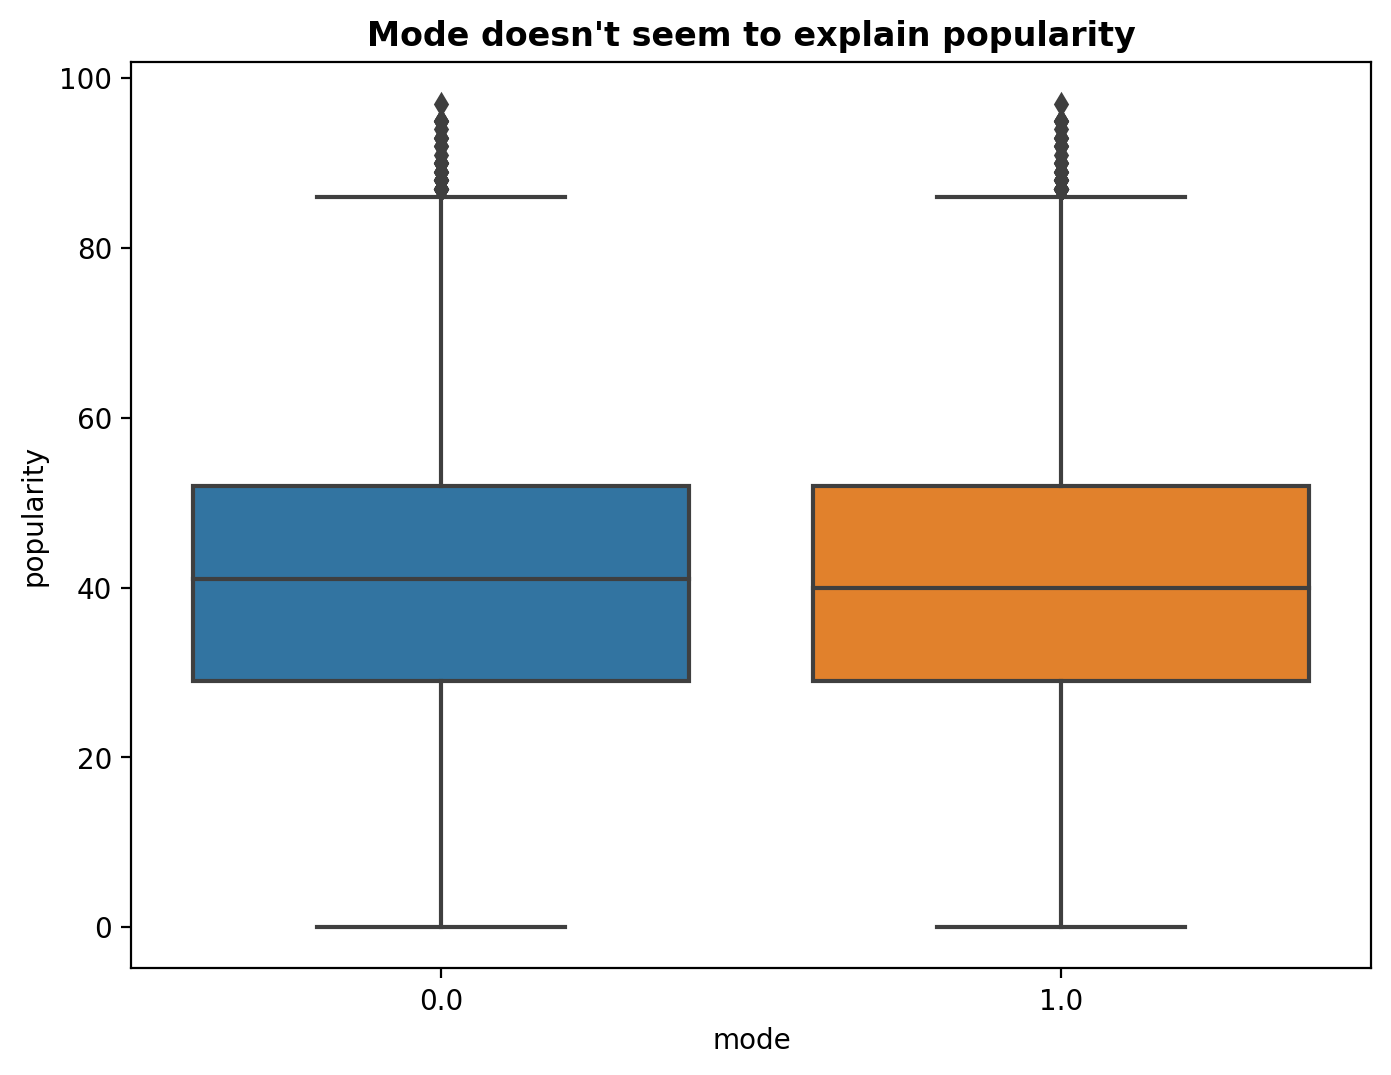

In [15]:
plt.figure(figsize=(8,6), dpi=200)
plt.title("Mode doesn't seem to explain popularity", 
          fontsize=12, fontweight="bold")
sns.boxplot(data=tracks_df, x="mode", y="popularity");

The nonexistent correlation is made apparent with this plot and we can make the decision to remove this variable from our analysis.

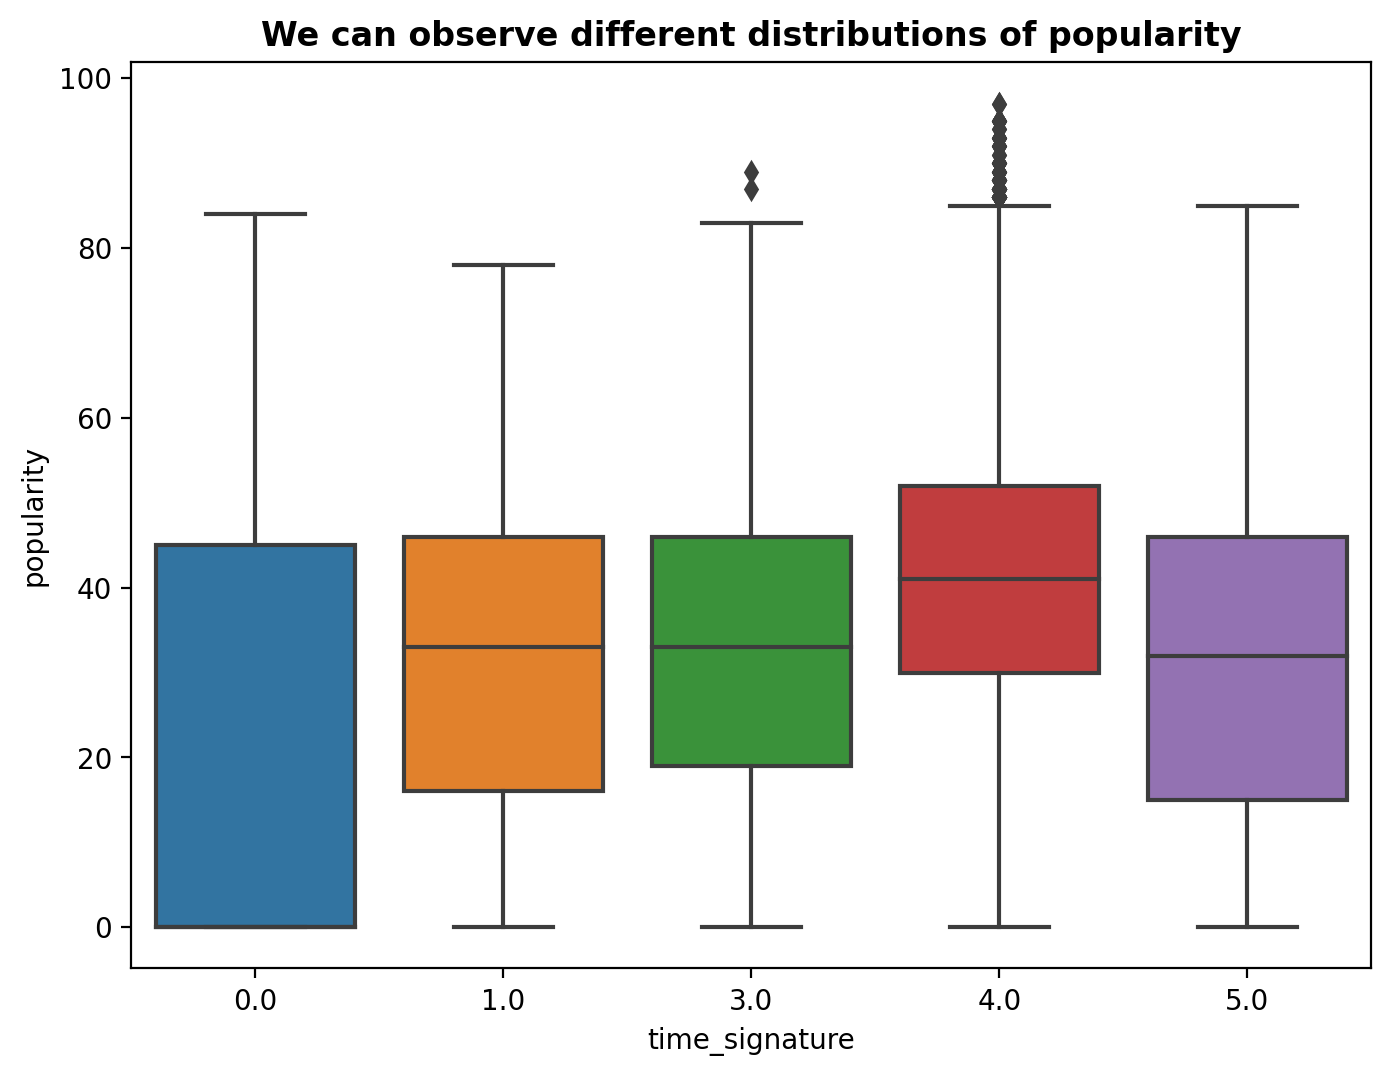

In [16]:
plt.figure(figsize=(8,6), dpi=200)
plt.title("We can observe different distributions of popularity", 
          fontsize=12, fontweight="bold")
sns.boxplot(data=tracks_df, x="time_signature", y="popularity");

This variable seems to infer different popularity values, however it should be taken into account the time relevance and the relationship to other time related variables.

It seems as we don't have relationships that are too relavant as to build our model on. With the help of other data sources we can try to find variables that can provide better usability.

As described before, and with the help of our data schema, our other sources are :

* **albums** 
* **artists**
* **low_level_audio_features**
* **lyrics_features**

Knowing our project goal we need to consider, conceptually, the importance of the variables available in these other sources. In order to enrich our dataset we will proceed to merge our main table with the remaining sources of data. 
So, conceptually, the variables that we will append to our data are the following:

* **artist_popularity** : the scale of popularity of the artist -> how does it relate to the number of followers?
* **followers** : the amount of followers of the artist, should have a notable relationship with track popularity.
* **genres** : the genres that the artist is related to
* **available_markets** : the markets where the song is available -> a variable with the number of available markets will also be created
* **album_type** : If the album is a single or not.
* **release_date** : The release date of the album - could help us create other features such as year or month.
* **total_tracks** : The total number of tracks in the album -> the album_type may provide enough information
* **mean_syllables_word** : The average number of syllables in words
* **mean_words_sentence** : The average number of words per sentence
* **n_sentences** : Number of sentences
* **n_words** : Number of words
* **sentence_similarity** : coefficient of similarity
* **vocabulary_wealth** : How rich the vocabulary is.

When it comes to the low level audio features, tests of correlation need to be applied as the number of technical variables is too high and it doesn't allow for a conceptual decision.

In [17]:
# Renaming columns
albums.rename(columns={"name":"track_name", "id":"album_id", 
                       "available_markets":"album_available_markets", 
                       "release_date":"album_release_date", 
                       "total_tracks":"album_total_tracks"}, inplace=True)
artists.rename(columns={"id":"artist_id", "name":"artist_name", "genres":"artist_genres"}, inplace=True)
tracks.rename(columns={"id":"track_id"}, inplace=True)

# Adding column with number of available markets
n_available_markets = []
for n in albums["album_available_markets"]:
    n_available_markets.append(len(n[1:-1].replace("'","").replace(" ","").split(",")))
albums["n_available_markets_album"] = n_available_markets

# Adding column with number of featured artists
n_artists_featured = []
for n in tracks["artists_id"]:
    n_artists_featured.append(len(n[1:-1].replace("'","").replace(" ","").split(",")))
tracks["n_artists_featured"] = n_artists_featured

# Albums columns
albums_columns = ["album_type", "album_release_date", "artist_id", 
                  "n_available_markets_album", "album_id", "album_total_tracks", "track_id"]
albums = albums.loc[:, albums_columns]

# Artist columns
artists_columns = ["artist_popularity", "followers", "artist_genres", "artist_id", "track_id"]
artists = artists.loc[:, artists_columns]

# Tracks columns
tracks_remove_columns = ["analysis_url", "artists_id", "available_markets", "disc_number", 
                         "href", "name", "playlist", "preview_url", "track_href", 
                         "track_name_prev", "track_number", "uri", "type", "lyrics",
                        "mode", "key"]
tracks = tracks[tracks.columns.difference(tracks_remove_columns)]

data_sources = tracks.merge(albums.loc[:, albums.columns != "track_id"], 
                            on="album_id").merge(artists.loc[:, artists.columns != "track_id"], 
                                                 on="artist_id")

features_extracted = low_level.merge(lyrics)

spotify_df = data_sources.merge(features_extracted).set_index("track_id")

In [18]:
spotify_df["year"] = spotify_df["album_release_date"].apply(lambda x : int(x[:4]))
spotify_df["month"] = spotify_df["album_release_date"].apply(lambda x : x[5:7])
spotify_df.drop("album_release_date", axis=1, inplace=True)

In [19]:
spotify_df.shape

(94253, 237)

We've enriched our dataset and now we should understand if the extra variables bring value. Before looking into the relationship between these features and our target variable, as we have 238 different features, we should understand if we have quasi-constant features or features that are highly correlated with each other.

In [20]:
spotify_df.drop(["album_id", "artist_id"], axis=1, inplace=True)

In [21]:
numeric_features = spotify_df.select_dtypes(include="number")

In [22]:
# Excluding Quasi-Constant Features
# Remove feature column where approximately 99% of the values are similar
features_df = numeric_features.loc[:, numeric_features.columns != "popularity"]
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(features_df)
quasi_constant_columns = [column for column in features_df.columns
                    if column not in features_df.columns[quasi_constant_filter.get_support()]]

print(f"Quasi-Constant Features: {quasi_constant_columns}")

Quasi-Constant Features: ['MEL_110', 'MEL_111', 'MEL_112', 'MEL_113', 'MEL_114', 'MEL_115', 'MEL_116', 'MEL_117', 'MEL_118', 'MEL_119', 'MEL_120', 'MEL_121', 'MEL_122', 'MEL_123', 'MEL_124', 'MEL_125', 'MEL_126', 'MEL_127', 'MEL_128', 'Tonnetz_1', 'Tonnetz_2', 'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'ZCR']


In [23]:
spotify_df = spotify_df[spotify_df.columns.difference(quasi_constant_columns)]

In [24]:
spotify_df.shape

(94253, 209)

In [25]:
# Excluding highly correlated features
features_df_2 = spotify_df.loc[:, spotify_df.columns!="popularity"]
correlation_matrix = features_df_2.corr()

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly-correlated Features: {correlated_features}")

Highly-correlated Features: {'MEL_101', 'spectral_rollOff_max', 'MEL_103', 'MEL_85', 'MEL_89', 'MEL_106', 'MEL_99', 'MEL_102', 'MEL_98', 'MEL_97', 'MEL_95', 'vocabulary_wealth', 'MEL_104', 'MEL_90', 'MEL_107', 'MEL_83', 'MEL_96', 'MEL_91', 'MEL_108', 'MEL_88', 'MEL_105', 'MEL_94', 'MEL_109', 'MEL_93', 'MEL_87'}


In [26]:
spotify_df = spotify_df[spotify_df.columns.difference(correlated_features)]

In [27]:
spotify_df.shape

(94253, 184)

<AxesSubplot:>

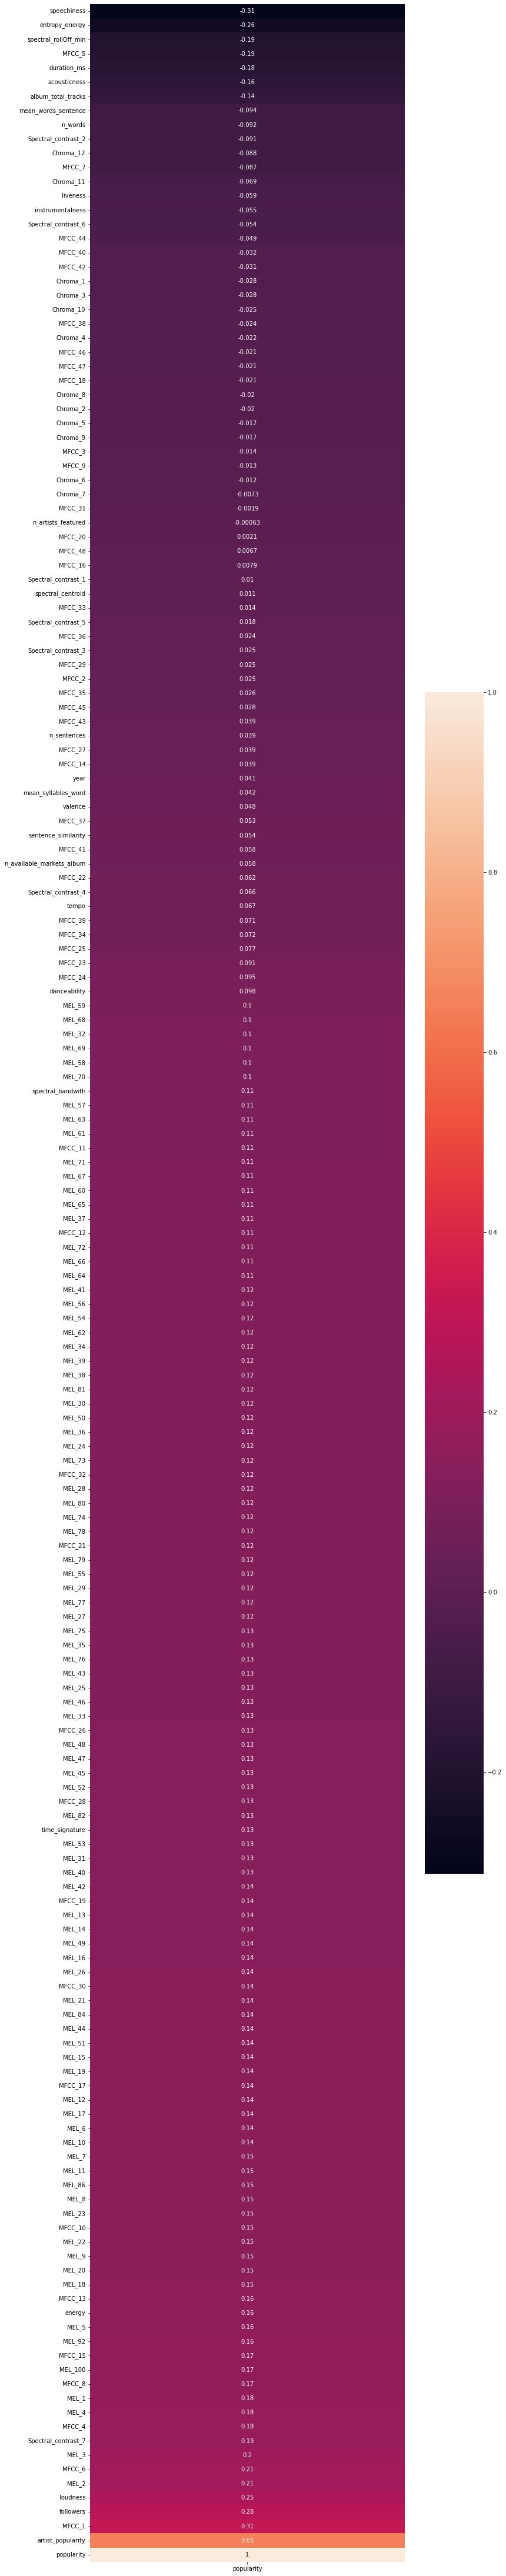

In [28]:
corr = spotify_df.corr()
popularity_corr = corr[["popularity"]]
popularity_corr = popularity_corr.sort_values(by=["popularity"])

fig, ax = plt.subplots(figsize=(12, 80))
sns.heatmap(popularity_corr, annot=True)

With the help of the heatmap above we can observe that we have several features with relevant values for correlation to our target variable, popularity. Choosing a threshold can help us reduce the number of variables considerably.

In [29]:
non_numeric_features = spotify_df.select_dtypes(exclude="number")

In [30]:
non_numeric_features

album_type  \
track_id                            
5qljLQuKnNJf4F4vfxQB0V     single   
3THTkAwJOsmxgizvYkBNRI     single   
3VAX2MJdmdqARLSU5hPMpm      album   
7rT11H4kU8yiq5FAFcd283      album   
1WJzRtI1ABzV3TPIeJZVvi      album   
...                           ...   
4Wd44BDoB1kOKoWrkTEtKr     single   
2c07bc2mwRIcuN52hoyzT0     single   
4L820y58kEWkXldgfjCDbg      album   
1GR1U3xkN1gf8dzvcyGxfa      album   
0ujklxrVM2jwpLMgbTwTd1      album   

                                                            artist_genres  \
track_id                                                                    
5qljLQuKnNJf4F4vfxQB0V                                  ['finnish indie']   
3THTkAwJOsmxgizvYkBNRI                                  ['finnish indie']   
3VAX2MJdmdqARLSU5hPMpm                                                 []   
7rT11H4kU8yiq5FAFcd283                                                 []   
1WJzRtI1ABzV3TPIeJZVvi                                                 []   
...                                                                   ...   
4Wd44BDoB1kOKoWrkTEtKr                                       ['sky room']   
2c07bc2mwRIcuN52hoyzT0  ['alternative r&b', 'deep pop r&b', 'indie r&b...   
4L820y58kEWkXldgfjCDbg                              ['icelandic hip hop']   
1GR1U3xkN1gf8dzvcyGxfa  ['australian alternative rock', 'australian in...   
0ujklxrVM2jwpLMgbTwTd1  ['australian alternative rock', 'australian in...   

                       country month  
track_id                              
5qljLQuKnNJf4F4vfxQB0V      BE    05  
3THTkAwJOsmxgizvYkBNRI      AR    01  
3VAX2MJdmdqARLSU5hPMpm      BE    03  
7rT11H4kU8yiq5FAFcd283      BE    03  
1WJzRtI1ABzV3TPIeJZVvi      BE    03  
...                        ...   ...  
4Wd44BDoB1kOKoWrkTEtKr      AR    06  
2c07bc2mwRIcuN52hoyzT0      AR    04  
4L820y58kEWkXldgfjCDbg      AR    11  
1GR1U3xkN1gf8dzvcyGxfa      AR        
0ujklxrVM2jwpLMgbTwTd1      AR    06  

[94253 rows x 4 columns]

-------------------------------
**Feature Selection**

To start we'll select the features with a correlation equal or higher to the absolute value of 0.15.

---------------------------------

In [31]:
cols_to_select = popularity_corr[abs(popularity_corr["popularity"]) >= 0.15].reset_index()["index"].unique().tolist()

input_data = spotify_df[cols_to_select].copy()

input_data = pd.concat([input_data, spotify_df[["album_type", "country", "month"]]], axis=1)

In [32]:
# Train Test Split

X = input_data.drop("popularity", axis=1)
y = input_data["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
numeric_cols = input_data.select_dtypes(include="number").drop("popularity", axis=1).columns

In [34]:
input_data.select_dtypes(exclude="number").columns

Index(['album_type', 'country', 'month'], dtype='object')

In [35]:
num_cols = list(numeric_cols)
ord_cols = ["month"]
cat_cols = ["album_type", "country"]

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

ord_pipeline = Pipeline([
    ('ord_encoder', OrdinalEncoder()),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
    ("ord", ord_pipeline, ord_cols),
    ])

In [36]:
train_prepared = preprocessor.fit_transform(X_train)
test_prepared = preprocessor.transform(X_test)

In [37]:
# Evaluation Dataframe

eval_df = pd.DataFrame()

In [38]:
# Linear Regression Model

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, y_train)
lin_preds = lin_reg.predict(test_prepared)

lin_mae = mean_absolute_error(y_test, lin_preds)
lin_mse = mean_squared_error(y_test, lin_preds)
lin_rmse = lin_mse**0.5
lin_r2 = r2_score(y_test, lin_preds)
print("MAE: %.4f"
      % lin_mae)
print("MSE: %.4f"
      % lin_mse)
print("RMSE: %.4f"
      % lin_rmse)
print("R^2: %.4f"
      % lin_r2)

lin_model = [lin_mae, lin_mse, lin_rmse, lin_r2]
eval_df["lin_reg"] = lin_model

MAE: 8.9434
MSE: 130.4874
RMSE: 11.4231
R^2: 0.5416


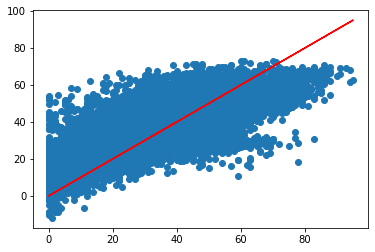

In [39]:
# Our predictions
plt.scatter(y_test,lin_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [40]:
# ANN

model = Sequential()

# input layer
model.add(Dense(train_prepared.shape[1],  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(7, activation='relu'))

# output layer
model.add(Dense(units=1,activation='linear'))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [42]:
model.fit(x=train_prepared, 
          y=y_train, 
          epochs=70,
          validation_data=(test_prepared, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/70
2357/2357 [==============================] - 8s 3ms/step - loss: 276.1827 - val_loss: 126.0380
Epoch 2/70
2357/2357 [==============================] - 6s 3ms/step - loss: 150.1733 - val_loss: 122.9612
Epoch 3/70
2357/2357 [==============================] - 7s 3ms/step - loss: 139.4617 - val_loss: 127.1077
Epoch 4/70
2357/2357 [==============================] - 7s 3ms/step - loss: 131.9933 - val_loss: 136.1531
Epoch 5/70
2357/2357 [==============================] - 6s 3ms/step - loss: 128.7484 - val_loss: 130.1788
Epoch 6/70
2357/2357 [==============================] - 6s 3ms/step - loss: 126.4364 - val_loss: 145.2222
Epoch 7/70
2357/2357 [==============================] - 6s 3ms/step - loss: 124.7946 - val_loss: 138.6325
Epoch 8/70
2357/2357 [==============================] - 6s 3ms/step - loss: 123.8909 - val_loss: 143.0391
Epoch 9/70
2357/2357 [==============================] - 6s 3ms/step - loss: 122.3785 - val_loss: 124.5807
Epoch 10/70
2357/2357 [=======================

In [43]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

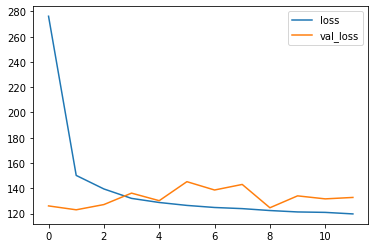

In [44]:
losses.plot()

In [45]:
dnn_preds = model.predict(test_prepared)

In [46]:
dnn_mae = mean_absolute_error(y_test, dnn_preds)
dnn_mse = mean_squared_error(y_test, dnn_preds)
dnn_rmse = dnn_mse**0.5
dnn_r2 = r2_score(y_test, dnn_preds)
print("MAE: %.4f"
      % dnn_mae)
print("MSE: %.4f"
      % dnn_mse)
print("RMSE: %.4f"
      % dnn_rmse)
print("R^2: %.4f"
      % dnn_r2)

dnn_model = [dnn_mae, dnn_mse, dnn_rmse, dnn_r2]
eval_df["dnn"] = dnn_model

MAE: 9.2492
MSE: 132.7489
RMSE: 11.5217
R^2: 0.5337


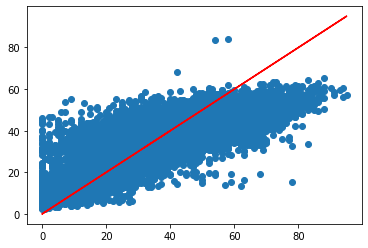

In [47]:
# Our predictions
plt.scatter(y_test,dnn_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [48]:
# Decision Trees

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_preds = tree_reg.fit(train_prepared, y_train)

In [49]:
tree_preds = tree_reg.predict(test_prepared)

tree_mae = mean_absolute_error(y_test, tree_preds)
tree_mse = mean_squared_error(y_test, tree_preds)
tree_rmse = tree_mse**0.5
tree_r2 = r2_score(y_test, tree_preds)
print("MAE: %.4f"
      % tree_mae)
print("MSE: %.4f"
      % tree_mse)
print("RMSE: %.4f"
      % tree_rmse)
print("R^2: %.4f"
      % tree_r2)

tree_model = [tree_mae, tree_mse, tree_rmse, tree_r2]
eval_df["dec_tree"] = tree_model

MAE: 10.4237
MSE: 194.4841
RMSE: 13.9458
R^2: 0.3168


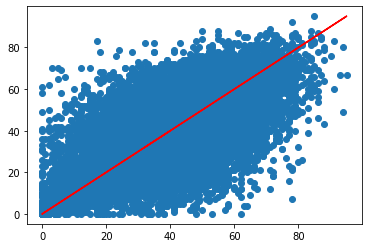

In [50]:
# Our predictions
plt.scatter(y_test,tree_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r');

In [51]:
# Random Forest

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(train_prepared, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [52]:
forest_preds = forest_reg.predict(test_prepared)

forest_mae = mean_absolute_error(y_test, forest_preds)
forest_mse = mean_squared_error(y_test, forest_preds)
forest_rmse = forest_mse**0.5
forest_r2 = r2_score(y_test, forest_preds)
print("MAE: %.4f"
      % forest_mae)
print("MSE: %.4f"
      % forest_mse)
print("RMSE: %.4f"
      % forest_rmse)
print("R^2: %.4f"
      % forest_r2)

forest_model = [forest_mae, forest_mse, forest_rmse, forest_r2]
eval_df["rand_forest"] = forest_model

MAE: 7.9042
MSE: 106.5385
RMSE: 10.3218
R^2: 0.6258


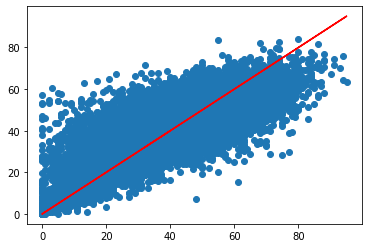

In [53]:
# Our predictions
plt.scatter(y_test,forest_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r');

In [54]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(train_prepared, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
xgb_preds = xgb_model.predict(test_prepared)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = xgb_mse**0.5
xgb_r2 = r2_score(y_test, xgb_preds)
print("MAE: %.4f"
      % xgb_mae)
print("MSE: %.4f"
      % xgb_mse)
print("RMSE: %.4f"
      % xgb_rmse)
print("R^2: %.4f"
      % xgb_r2)

xgb_model = [xgb_mae, xgb_mse, xgb_rmse, xgb_r2]
eval_df["xgb"] = xgb_model

MAE: 7.7590
MSE: 99.9889
RMSE: 9.9994
R^2: 0.6488


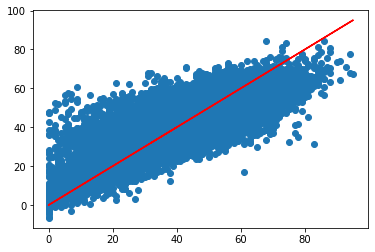

In [56]:
# Our predictions
plt.scatter(y_test,xgb_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r');

In [57]:
eval_df.index = ["MAE", "MSE", "RMSE", "R2"]

In [58]:
eval_df

lin_reg         dnn    dec_tree  rand_forest        xgb
MAE     8.943445    9.249177   10.423691     7.904167   7.758982
MSE   130.487373  132.748858  194.484112   106.538524  99.988885
RMSE   11.423107   11.521669   13.945756    10.321750   9.999444
R2      0.541645    0.533701    0.316848     0.625769   0.648775

<h3>Model selection</h3>

<h5>Linear Regression</h5>
A linear regression model is a linear model that assumes that the target variable can be calculated from a linear combination of the input variables. In our case, as there are multiple input variables, the model will be a multiple linear regression.
<h5>ANN</h5>
An artificial neural network model is a simplified model of the way the human brain processes information. It is characterized by three parts: an input layer, one or more hidden layers and an output layer representing the target variable. The network learns through training: it examines individual records, generates a prediction for each record, and adjusts the weights whenever it makes an incorrect prediction. This process is repeated many times, and the network continues to improve its predictions until one or more of the stopping criteria have been met. In our case, we choose to have 2 hidden layers (each with 15 features) and the activation algorithm to be Relu.
<h5>Decision Tree</h5>
A decision tree model builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The result is a tree with decision nodes and leaf nodes. In our case, as our target variable is a continuous variable and it is not a classification problem, the model will be a decision tree regression.
<h5>Random Forest</h5>
A random forest model builds an ensemble of decision trees and then merges them together to get a more accurate and stable prediction. While the decision tree model might suffer from overfitting as the tree grows deeper, with the random forest model this is avoided by creating random subsets of the features and building smaller trees using those subsets and then combining those subtrees. In our case, as our target variable is a continuous variable and it is not a classification problem, the model will be a random forest regression.
<h5>XGBoost</h5>
A XGBoost model is similar to a random forest model in that both consist of multiple decision trees. The difference is in how these trees are built and combined. In a random forest model, the technique “bagging” minimizes the variance and overfitting, while in Gradient Boosting Decision Trees “boosting” minimizes the bias and underfitting. In our case, as our target variable is a continuous variable and it is not a classification problem, the model will be a XGBoost regression.

<h5>Metrics</h5>

For this project, four regression metrics were used, these being Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and $R^{2}$. For the first three metrics mentioned before, smaller values represent a better prediction, while for the $R^{2}$, generally, greater values represent a better model generalization.



<lu>
    <li><b>Mean Absolute Error (MAE)</b>: This is the average of the absolute differences between prediction and actual observation, or in other words, the average value of the residuals. MAE = $\frac{1}{n}\sum_{i=1}^{n}|x_i-y_i|$</li>
    <li><b>Mean Squared Error (MSE)</b>: This is the average of the squared differences between prediction and actual observation, representing the variance of the residuals. MSE = $\frac{1}{n}\sum_{i=1}^{n}(x_i-y_i)^2$</li>
    <li><b>Root Mean Squared Error (RMSE)</b>: This is the root of the average of the squared differences between prediction and actual observation, representing the standard deviation of the residuals. RMSE = $\sqrt{MSE}$</li>
    <li><b>Coefficient of determination ($R^{2}$)</b>: This metric is related to how close the data are fitted to the regression line. $R^{2}$ = Explained variation / Total variation</li>
</lu>

<h5>Final choice </h5>By observing the results from each of these metrics obtained for each model, the XGBoost model was the one who performed best in all of them, therefore this was the model chosen to work on and improve its performance. 

In [61]:
# Optimize our best model (Xgb)

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgb_reg = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgb_reg, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)
clf.fit(train_prepared, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest MAE: ", (-clf.best_score_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}
Lowest RMSE:  2.72726903979443


In [66]:
final_xgb = xgb.XGBRegressor(seed = 20, colsample_bytree=0.7, learning_rate=0.01,
                             max_depth=10, n_estimators=1000)

In [67]:
final_xgb.fit(train_prepared, y_train)
 
final_xgb_preds = final_xgb.predict(test_prepared)

print("MAE: %.4f"
      % mean_absolute_error(y_test, final_xgb_preds))
print("MSE: %.4f"
      % mean_squared_error(y_test, final_xgb_preds))
print("RMSE: %.4f"
      % mean_squared_error(y_test, final_xgb_preds)**0.5)
print("R^2: %.4f"
      % r2_score(y_test, final_xgb_preds))

MAE: 7.4539
MSE: 92.9194
RMSE: 9.6395
R^2: 0.6736


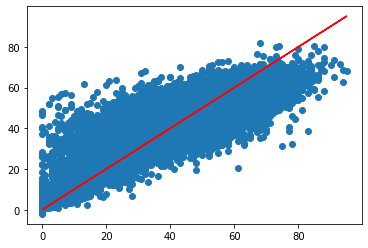

In [68]:
# Our predictions
plt.scatter(y_test,final_xgb_preds)

# Perfect predictions
plt.plot(y_test,y_test,'r');

In [79]:
feature_names = ['speechiness', 'entropy_energy', 'spectral_rollOff_min', 'MFCC_5',
       'duration_ms', 'acousticness', 'MEL_9', 'MEL_20', 'MEL_18', 'MFCC_13',
       'energy', 'MEL_5', 'MEL_92', 'MFCC_15', 'MEL_100', 'MFCC_8', 'MEL_1',
       'MEL_4', 'MFCC_4', 'Spectral_contrast_7', 'MEL_3', 'MFCC_6', 'MEL_2',
       'loudness', 'followers', 'MFCC_1', 'artist_popularity', 'album_type_single',
       'album_type_album', 'album_type_compilation', 'country_BE', 'country_AR',
        'country_FI', 'month']
#final_xgb.get_booster().feature_names = feature_names

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

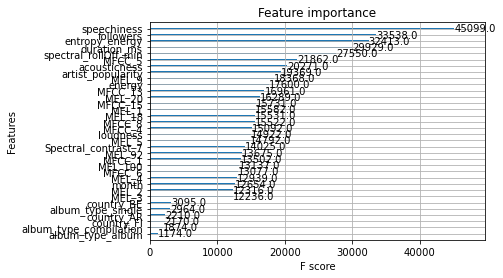

In [95]:
xgb.plot_importance(final_xgb)

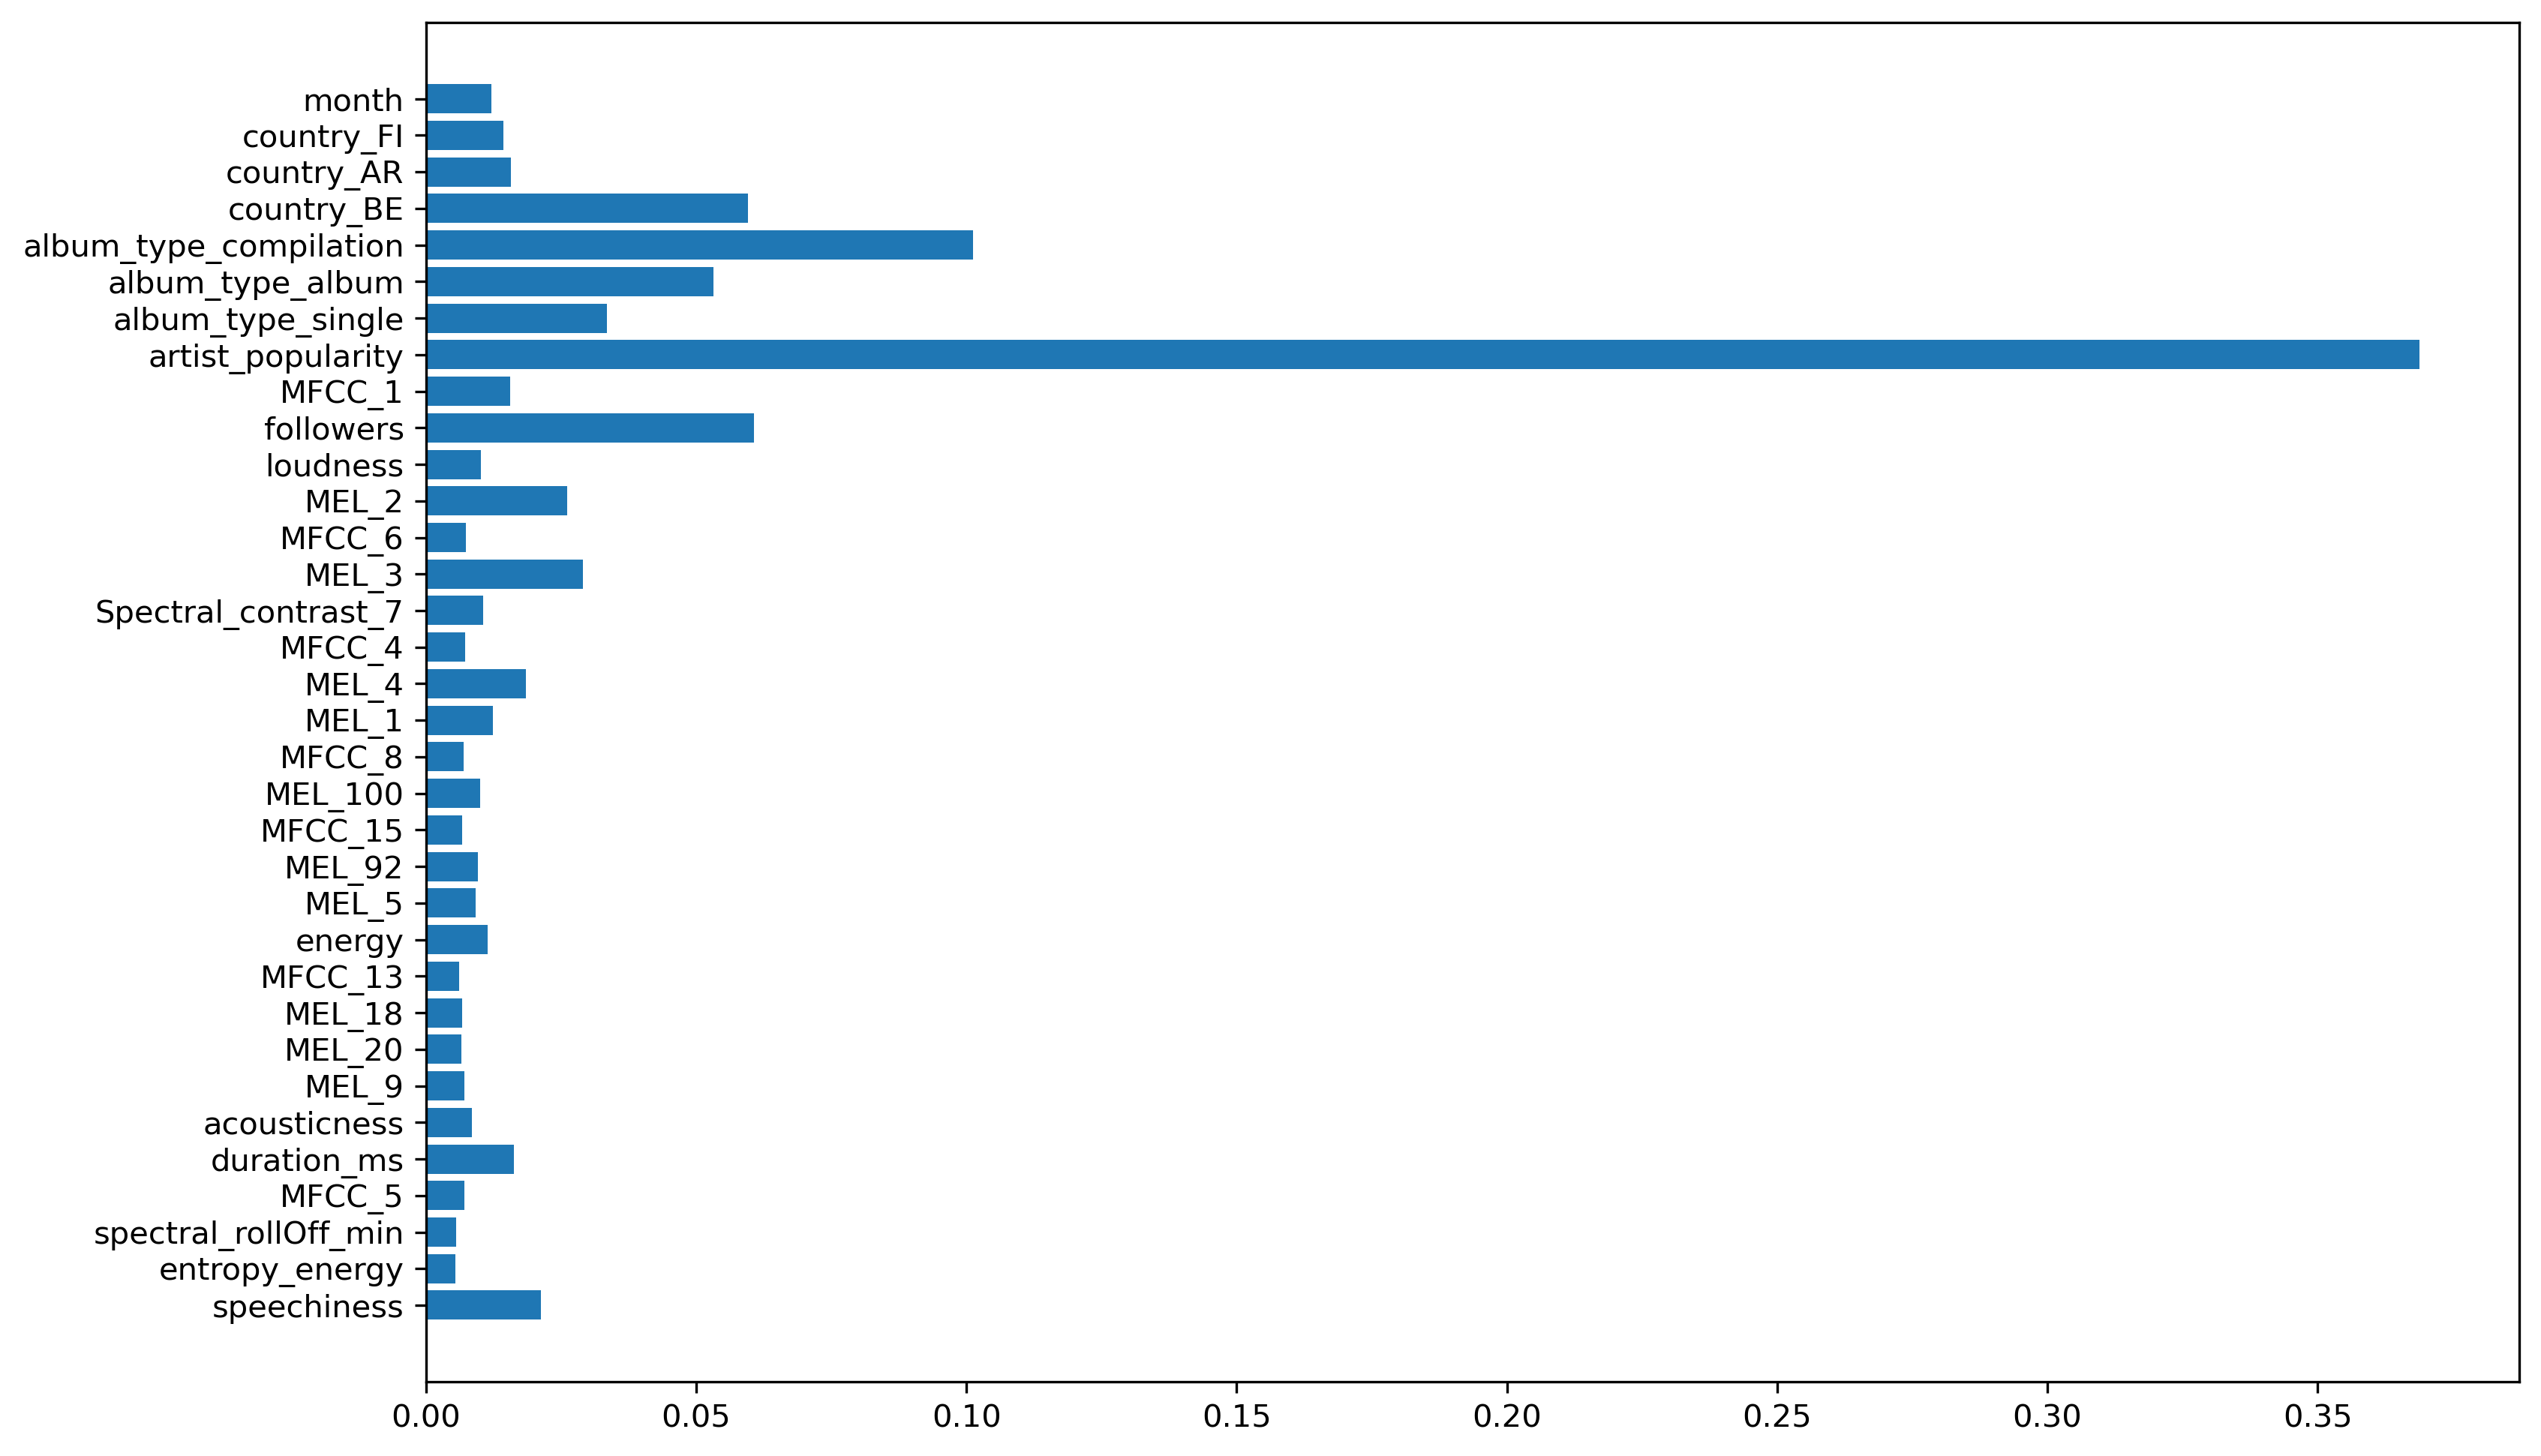

In [94]:
plt.figure(figsize=(12,8), dpi=300)
plt.barh(feature_names, final_xgb.feature_importances_)
plt.show()

**Result analysis** :
* Understand the best error (interpret)
* What are our best features
* What does this mean, conceptually
* Reference the possible artist_popularity bias
* Re-select the features

<h5>Best Error Metric</h5>
For the purpose of this project, the best error metric we could use to evaluate is the $R^{2}$ since it is an intuitive method of evaluation and can inform how well or model fits the data available. Our unoptimized XGBoost model presented a $R^{2}$ score of 0.648775 while the optimized one obtained 0.6736, an improvement of 0.024825. Therefore, the proportion of the variability for the target variable that is explained by the input variables is 67.36%.

<h5>Best Features</h5>
The graph on the cell above represents the feature importances for the XGBoost model. We had 5 features with a value greater or equal to 0.05 (artist_popularity, album_type_compilation, followers, country_BE, album_type_album), and as we can see, some of them are way more relevant than others, for example, artist_popularity. A great disparity in importance values (over 0.25 when compared to the next relevant feature) can generate a great bias for the prediction, in this case, a popular artist will generally have a greater song popularity score.

<h5>Suggestions</h5>
<lu>
    <li>Conceptualize, create and generate new features that can have a greater importance in song popularity</li>
    <li>Create models with the top N most important features, with and without artist_popularity. As we could see it has a great importance in the model, but with a huge difference in importance that may cause some bias. Depending on the business strategy, it would be interesting to include or exclude this feature</li>
    <li>Obtain a larger dataset including more countries, since we only had data for 3 countries</li>
</lu>